# Deep Learning with Python.pdf  
# Chapter 5 Deep Learning for computor vision
This chapter covers
 * Understanding convolutional neural networks (convnets)
 * Using data augmentation to mitigate overfitting
 * Using a pretrained convnet to do feature extraction
 * Fine-tuning a pretrained convnet
 * Visualizing what convnets learn and how they make classification decisions

In [ ]:
# Listing 5.1 Instantiating a small convnet

from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

In [4]:
# Listing 5.2 Adding a classifier on top of the convnet

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

In [6]:
# Listing 5.3 Training the convnet on MNIST images

from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
60000/60000 [==============================] - 16s 269us/step - loss: 0.1717 - acc: 0.9468
Epoch 2/5
60000/60000 [==============================] - 12s 196us/step - loss: 0.0481 - acc: 0.9852
Epoch 3/5
60000/60000 [==============================] - 12s 195us/step - loss: 0.0332 - acc: 0.9895
Epoch 4/5
60000/60000 [==============================] - 12s 196us/step - loss: 0.0247 - acc: 0.9923
Epoch 5/5
60000/60000 [==============================] - 12s 194us/step - loss: 0.0197 - acc: 0.9939


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 141us/step


0.9912

# 5.2.2 Downloading the data
The Dogs vs. Cats dataset that you’ll use isn’t packaged with Keras. It was made available by Kaggle as part of a computer-vision competition in late 2013, back when convnets weren’t mainstream. You can download the original dataset from www.kaggle.com/c/dogs-vs-cats/data (you’ll need to create a Kaggle account if you don’t already have one—don’t worry, the process is painless). The pictures are medium-resolution color JPEGs. Unsurprisingly, the dogs-versus-cats Kaggle competition in 2013 was won by entrants who used convnets. The best entries achieved up to 95% accuracy. In this example, you’ll get fairly close to this accuracy (in the next section), even though you’ll train your models on less than 10% of the data that was available to the competitors. This dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543 MB (compressed). After downloading and uncompressing it, you’ll create a new dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.

In [1]:
# Listing 5.4 Copying images to training, validation, and test directories

import os, shutil
base_dir = 'd:/@dataset/catdog'

In [2]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [4]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [5]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [6]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [7]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [8]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [9]:
# Listing 5.5 Instantiating a small convnet for dogs vs. cats classification

from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
# Listing 5.6 Configuring the model for training

from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
# Listing 5.7 Using ImageDataGenerator to read images from directories

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [15]:
# Listing 5.8 Fitting the model using a batch generator

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)


Epoch 1/30
100/100 [==============================] - 20s 198ms/step - loss: 0.6882 - acc: 0.5375 - val_loss: 0.6689 - val_acc: 0.6070
Epoch 2/30
100/100 [==============================] - 22s 221ms/step - loss: 0.6545 - acc: 0.6315 - val_loss: 0.6346 - val_acc: 0.6580
Epoch 3/30
100/100 [==============================] - 18s 181ms/step - loss: 0.6128 - acc: 0.6820 - val_loss: 0.6397 - val_acc: 0.6320
Epoch 4/30
100/100 [==============================] - 19s 187ms/step - loss: 0.5782 - acc: 0.7005 - val_loss: 0.5837 - val_acc: 0.6980
Epoch 5/30
100/100 [==============================] - 23s 232ms/step - loss: 0.5439 - acc: 0.7225 - val_loss: 0.5808 - val_acc: 0.7030
Epoch 6/30
100/100 [==============================] - 22s 221ms/step - loss: 0.5040 - acc: 0.7570 - val_loss: 0.5554 - val_acc: 0.7120
Epoch 7/30
100/100 [==============================] - 23s 228ms/step - loss: 0.4791 - acc: 0.7755 - val_loss: 0.5843 - val_acc: 0.6960
Epoch 8/30
100/100 [==============================] - 

In [16]:
# Listing 5.9 Saving the model
model.save('catdog1.h5')

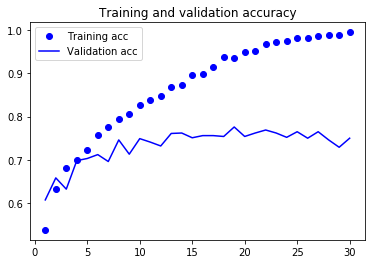

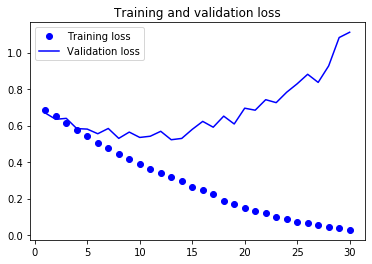

In [18]:
# Listing 5.10 Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt
%matplotlib inline  

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
# Listing 5.11 Setting up a data augmentation configuration via ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

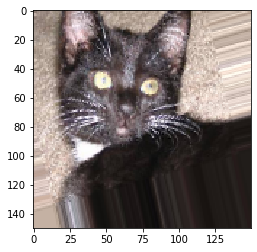

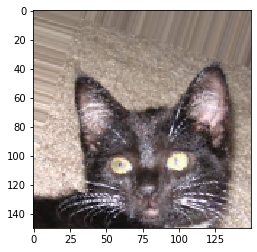

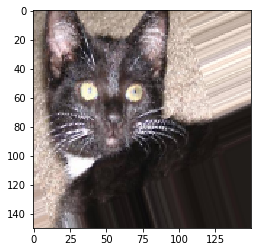

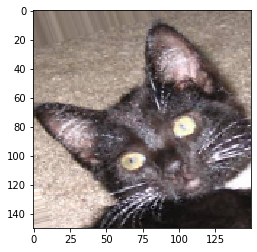

In [22]:
# Listing 5.12 Displaying some randomly augmented training images

from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
        fname in os.listdir(train_cats_dir)]

img_path = fnames[5]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [23]:
# Listing 5.13 Defining a new convnet that includes dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
            metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
# Listing 5.14 Training the convnet using data-augmentation generators

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 58s 581ms/step - loss: 0.6915 - acc: 0.5181 - val_loss: 0.6815 - val_acc: 0.5698
Epoch 2/100
100/100 [==============================] - 60s 599ms/step - loss: 0.6723 - acc: 0.5712 - val_loss: 0.6565 - val_acc: 0.6005
Epoch 3/100
100/100 [==============================] - 62s 623ms/step - loss: 0.6599 - acc: 0.6084 - val_loss: 0.6840 - val_acc: 0.5628
Epoch 4/100
100/100 [==============================] - 63s 634ms/step - loss: 0.6471 - acc: 0.6050 - val_loss: 0.6204 - val_acc: 0.6598
Epoch 5/100
100/100 [==============================] - 69s 690ms/step - loss: 0.6292 - acc: 0.6413 - val_loss: 0.6278 - val_acc: 0.6662
Epoch 6/100
100/100 [==============================] - 58s 580ms/step - loss: 0.6100 - acc: 0.6606 - val_loss: 0.6660 - val_acc: 0.6211
Epoch 7/100
100/100 [==============================] - 64s 642ms/step - loss: 0.6062 - acc: 0.6622 -

100/100 [==============================] - 57s 573ms/step - loss: 0.4034 - acc: 0.8137 - val_loss: 0.4439 - val_acc: 0.7976
Epoch 61/100
100/100 [==============================] - 51s 511ms/step - loss: 0.4018 - acc: 0.8169 - val_loss: 0.4145 - val_acc: 0.8144
Epoch 62/100
100/100 [==============================] - 64s 636ms/step - loss: 0.4064 - acc: 0.8128 - val_loss: 0.4219 - val_acc: 0.8096
Epoch 63/100
100/100 [==============================] - 51s 513ms/step - loss: 0.3981 - acc: 0.8200 - val_loss: 0.4876 - val_acc: 0.7951
Epoch 64/100
100/100 [==============================] - 58s 576ms/step - loss: 0.3953 - acc: 0.8150 - val_loss: 0.4353 - val_acc: 0.8041
Epoch 65/100
100/100 [==============================] - 52s 517ms/step - loss: 0.4143 - acc: 0.8041 - val_loss: 0.4124 - val_acc: 0.8192
Epoch 66/100
100/100 [==============================] - 51s 511ms/step - loss: 0.4060 - acc: 0.8172 - val_loss: 0.4263 - val_acc: 0.8041
Epoch 67/100
100/100 [==============================] 

In [25]:
# Listing 5.15 Saving the model

model.save('catdog2.h5')

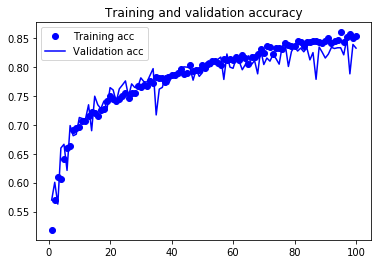

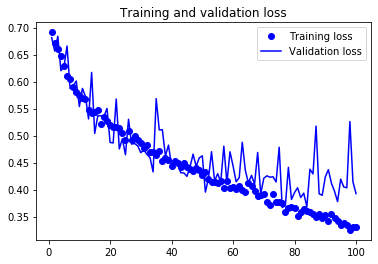

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline  

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
# Listing 5.16 Instantiating the VGG16 convolutional base

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(150, 150, 3))

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d6bbae143d832006294945121d1f1fc so we will re-download the data.
58892288/58889256 [==============================] - 66s 1us/step


In [28]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [29]:
# Listing 5.17 Extracting features using the pretrained convolutional base

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# base_dir = '/Users/fchollet/Downloads/cats_and_dogs_small'
base_dir = 'd:/@dataset/catdog'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

# The extracted features are currently of shape (samples, 4, 4, 512). You’ll feed them
# to a densely connected classifier, so first you must flatten them to (samples, 8192):

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
# Listing 5.18 Defining and training the densely connected classifier

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                loss='binary_crossentropy',
                metrics=['acc'])

model.summary()

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6231 - acc: 0.6430 - val_loss: 0.4550 - val_acc: 0.8330
Epoch 2/30
2000/2000 [==============================] - 2s 879us/step - loss: 0.4401 - acc: 0.8055 - val_loss: 0.3835 - val_acc: 0.8400
Epoch 3/30
2000/2000 [==============================] - 2s 882us/step - loss: 

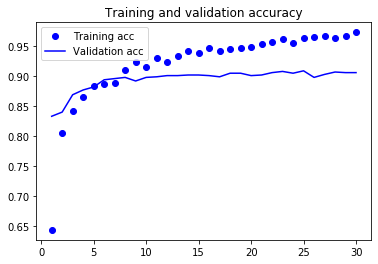

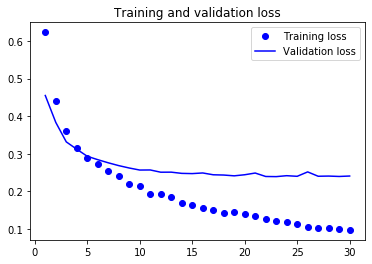

In [31]:
# Listing 5.19 Plotting the results

import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# FEATURE EXTRACTION WITH DATA AUGMENTATION
Now, let’s review the second technique I mentioned for doing feature extraction,
which is much slower and more expensive, but which allows you to use data augmentation
during training: extending the conv_base model and running it end to end on
the inputs.

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

In [33]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [35]:
conv_base.trainable = False
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [36]:
# Listing 5.21 Training the model end to end with a frozen convolutional base

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255) # Note that the validation data shouldn’t be augmented!

train_generator = train_datagen.flow_from_directory(train_dir,  # Traget directory 
                                    target_size=(150, 150),   # Resize all images to 150 x 150
                                    batch_size=20,
                                    class_mode='binary') # Because you use binary_crossentropy loss, you need binary lables

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                    target_size=(150, 150),
                                    batch_size=20,
                                    class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 110s 1s/step - loss: 0.6007 - acc: 0.6870 - val_loss: 0.4684 - val_acc: 0.7980
Epoch 2/30
100/100 [==============================] - 109s 1s/step - loss: 0.4815 - acc: 0.7855 - val_loss: 0.3749 - val_acc: 0.8530
Epoch 3/30
100/100 [==============================] - 112s 1s/step - loss: 0.4351 - acc: 0.8105 - val_loss: 0.3440 - val_acc: 0.8630
Epoch 4/30
100/100 [==============================] - 112s 1s/step - loss: 0.4061 - acc: 0.8210 - val_loss: 0.3223 - val_acc: 0.8720
Epoch 5/30
100/100 [==============================] - 111s 1s/step - loss: 0.3801 - acc: 0.8290 - val_loss: 0.3089 - val_acc: 0.8750
Epoch 6/30
100/100 [==============================] - 111s 1s/step - loss: 0.3702 - acc: 0.8445 - val_loss: 0.3176 - val_acc: 0.8610
Epoch 7/30
100/100 [==============================] - 110s 1s/step - loss: 0.3584 - acc: 0.8475 - val_loss: 0.2935 - v

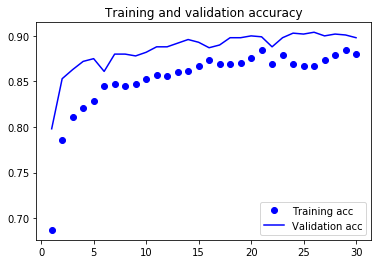

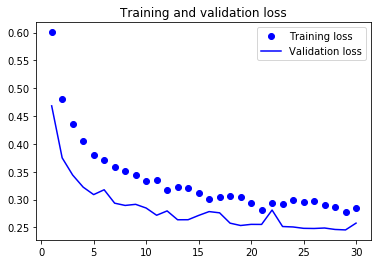

In [37]:
# Let’s plot the results again (see figures 5.17 and 5.18). As you can see, you reach a validation accuracy of about 96%.

import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Fine-tuning
Another widely used technique for model reuse, complementary to feature
extraction, is fine-tuning (see figure 5.19). Fine-tuning consists of unfreezing a few of
the top layers of a frozen model base used for feature extraction, and jointly training
both the newly added part of the model (in this case, the fully connected classifier)
and these top layers. This is called fine-tuning because it slightly adjusts the more
abstract representations of the model being reused, in order to make them more relevant
for the problem at hand.

In [38]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [39]:
# Listing 5.22 Freezing all layers up to a specific one

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Now you can begin fine-tuning the network. You’ll do this with the RMSProp optimizer,
using a very low learning rate. The reason for using a low learning rate is that
you want to limit the magnitude of the modifications you make to the representations
of the three layers you’re fine-tuning. Updates that are too large may harm these representations.

In [40]:
# Listing 5.23 Fine-tuning the model

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/100
100/100 [==============================] - 119s 1s/step - loss: 0.2782 - acc: 0.8825 - val_loss: 0.2285 - val_acc: 0.8980
Epoch 2/100
100/100 [==============================] - 128s 1s/step - loss: 0.2609 - acc: 0.8875 - val_loss: 0.2192 - val_acc: 0.9170
Epoch 3/100
100/100 [==============================] - 125s 1s/step - loss: 0.2533 - acc: 0.8940 - val_loss: 0.2219 - val_acc: 0.9100
Epoch 4/100
100/100 [==============================] - 124s 1s/step - loss: 0.2148 - acc: 0.9075 - val_loss: 0.2215 - val_acc: 0.9170
Epoch 5/100
100/100 [==============================] - 125s 1s/step - loss: 0.2077 - acc: 0.9185 - val_loss: 0.2588 - val_acc: 0.9090
Epoch 6/100
100/100 [==============================] - 128s 1s/step - loss: 0.1836 - acc: 0.9245 - val_loss: 0.2114 - val_acc: 0.9170
Epoch 7/100
100/100 [==============================] - 121s 1s/step - loss: 0.2035 - acc: 0.9160 - val_loss: 0.1960 - val_acc: 0.9310
Epoch 8/100
100/100 [==============================] - 127s 1s

Epoch 62/100
100/100 [==============================] - 127s 1s/step - loss: 0.0297 - acc: 0.9905 - val_loss: 0.2286 - val_acc: 0.9380
Epoch 63/100
100/100 [==============================] - 126s 1s/step - loss: 0.0304 - acc: 0.9875 - val_loss: 0.3025 - val_acc: 0.9400
Epoch 64/100
100/100 [==============================] - 127s 1s/step - loss: 0.0328 - acc: 0.9875 - val_loss: 0.2436 - val_acc: 0.9450
Epoch 65/100
100/100 [==============================] - 128s 1s/step - loss: 0.0318 - acc: 0.9885 - val_loss: 0.2840 - val_acc: 0.9370
Epoch 66/100
100/100 [==============================] - 128s 1s/step - loss: 0.0248 - acc: 0.9900 - val_loss: 0.2392 - val_acc: 0.9510
Epoch 67/100
100/100 [==============================] - 126s 1s/step - loss: 0.0251 - acc: 0.9915 - val_loss: 0.2006 - val_acc: 0.9520
Epoch 68/100
100/100 [==============================] - 126s 1s/step - loss: 0.0289 - acc: 0.9890 - val_loss: 0.2800 - val_acc: 0.9410
Epoch 69/100
100/100 [==============================] -

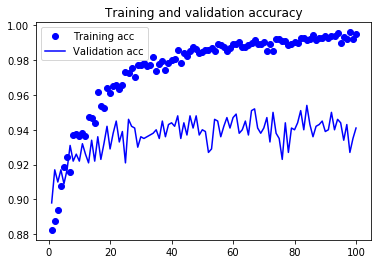

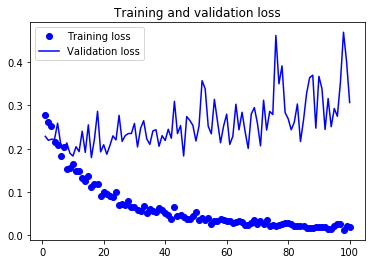

In [41]:
# Let’s plot the results using the same plotting code as before (see figures 5.20 and 5.21).

import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These curves look noisy. To make them more readable, you can smooth them by
replacing every loss and accuracy with exponential moving averages of these quantities.
Here’s a trivial utility function to do this (see figures 5.22 and 5.23).

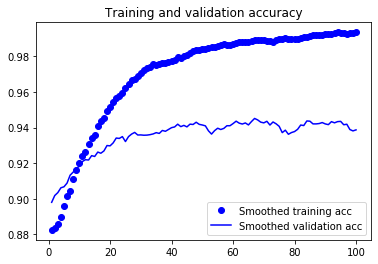

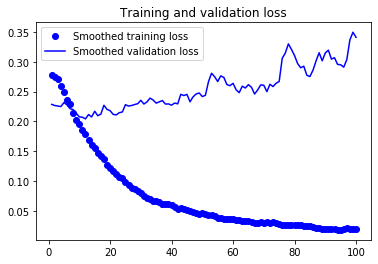

In [42]:
# Listing 5.24 Smoothing the plots

def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
        smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
        smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
        smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
        smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [43]:
test_generator = test_datagen.flow_from_directory(test_dir,
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9569999921321869


# 5.3.3 Wrapping up
Here’s what you should take away from the exercises in the past two sections:

 * Convnets are the best type of machine-learning models for computer-vision tasks. It’s possible to train one from scratch even on a very small dataset, with decent results.
 * On a small dataset, overfitting will be the main issue. Data augmentation is a powerful way to fight overfitting when you’re working with image data.
 * It’s easy to reuse an existing convnet on a new dataset via feature extraction. This is a valuable technique for working with small image datasets.
 * As a complement to feature extraction, you can use fine-tuning, which adapts to a new problem some of the representations previously learned by an existing model. This pushes performance a bit further. Now you have a solid set of tools for dealing with image-classification problems—in particular with small datasets.

# 5.4 Visualizing what convnets learn
* Visualizing intermediate convnet outputs (intermediate activations)
* Visualizing convnets filters
* Visualizing heatmaps of class activation in an image

## 5.4.1 Visualizing intermediate activations

In [48]:
from keras.models import load_model
model = load_model('catdog2.h5')
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [49]:
# Listing 5.25 Preprocessing a single image

img_path = 'd:/@dataset/catdog/test/cats/cat.4508.jpg'

from keras.preprocessing import image # Preprocesses the image into a 4D tensor
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.  # Remember that the model was trained on inputs that were preprocessed this way.

print(img_tensor.shape)

(1, 150, 150, 3)


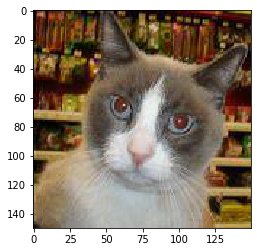

In [50]:
# Listing 5.26 Displaying the test picture

import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [51]:
# Listing 5.27 Instantiating a model from an input tensor and a list of output tensors

from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]] # Extracts the outputs of the top eight layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, 
# given the model input

In [52]:
# Listing 5.28 Running the model in predict mode

activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation

In [53]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


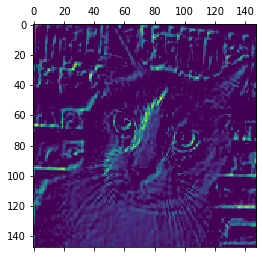

In [68]:
# Listing 5.29 Visualizing the fourth channel

import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 11], cmap='viridis')

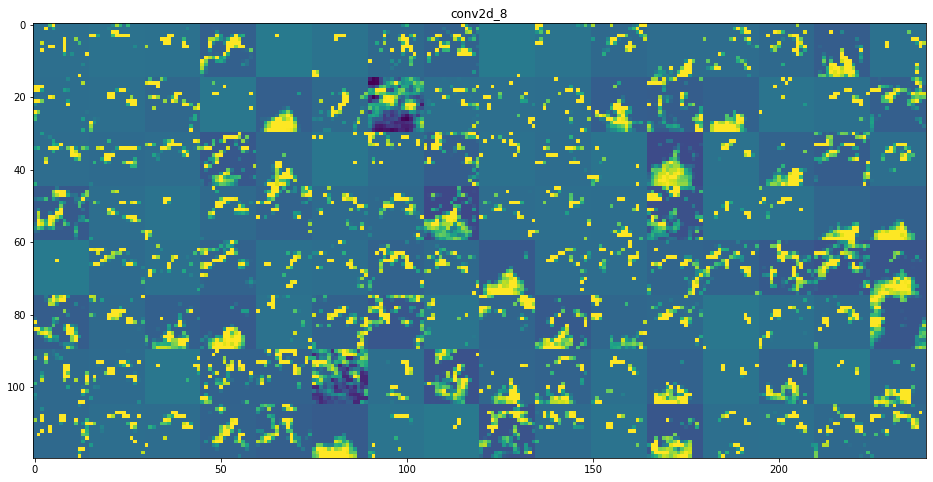

In [74]:
# Listing 5.31 Visualizing every channel in every intermediate activation

layer_names = []
for layer in model.layers[:7]:     # Names of the layers, so you can have them as part of your plot
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    
    size = layer_activation.shape[1]  # The feature map has shape (1, size, size, n_features).
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                            :, :,
                                            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                        row * size : (row + 1) * size] = channel_image
            
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],
                    scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

# 5.4.2 Visualizing convnet filters

In [75]:
# Listing 5.32 Defining the loss tensor for filter visualization

from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
                include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [76]:
# Listing 5.33 Obtaining the gradient of the loss with regard to the input

grads = K.gradients(loss, model.input)[0]

In [77]:
# Listing 5.34 Gradient-normalization trick

grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [78]:
# Listing 5.35 Fetching Numpy output values given Numpy input values

iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [82]:
# Listing 5.36 Loss maximization via stochastic gradient descent

input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.  # Starts from a gray image with some noise

step = 1.               # Magnitude of each gradient update
for i in range(40):
            loss_value, grads_value = iterate([input_img_data])
        
            input_img_data += grads_value * step


In [83]:
# Listing 5.37 Utility function to convert a tensor into a valid image

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255    # Converts to an RGB array
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [84]:
# Listing 5.38 Function to generate filter visualizations

def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)

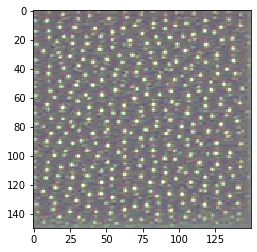

In [85]:
plt.imshow(generate_pattern('block3_conv1', 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


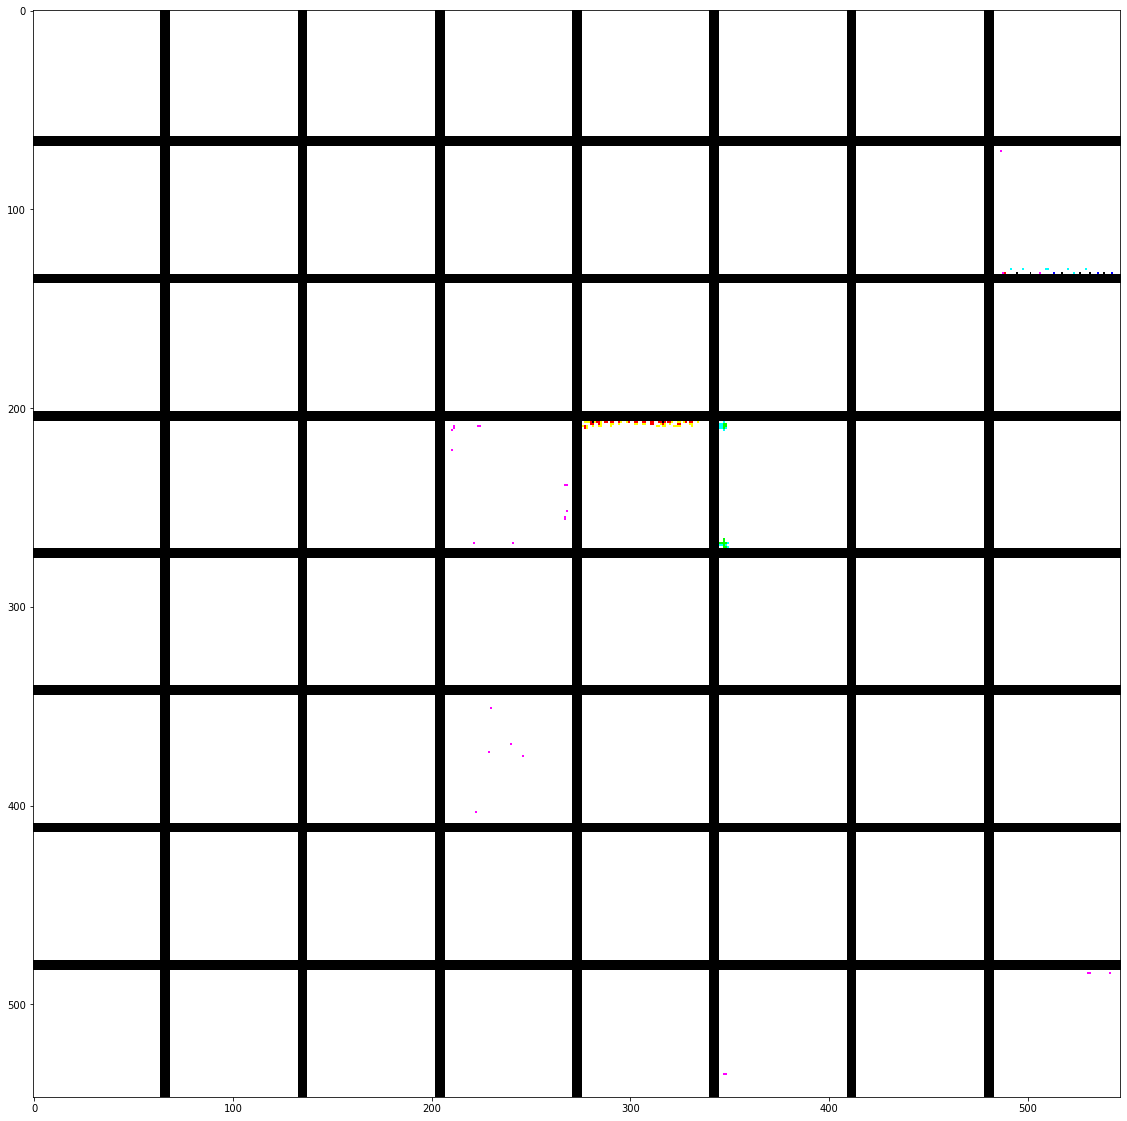

In [88]:
# Listing 5.39 Generating a grid of all filter response patterns in a layer

layer_name = 'block2_conv1'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end,
                            vertical_start: vertical_end, :] = filter_img
        
plt.figure(figsize=(20, 20))
plt.imshow(results)

# 5.4.3 Visualizing heatmaps of class activation

In [89]:
# Listing 5.40 Loading the VGG16 network with pretrained weights

from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

In [90]:
# Listing 5.41 Preprocessing an input image for VGG16

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
# img_path = '/Users/fchollet/Downloads/creative_commons_elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [91]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 1us/step
Predicted: [('n02123597', 'Siamese_cat', 0.9828011), ('n02124075', 'Egyptian_cat', 0.011881679), ('n02127052', 'lynx', 0.0014613424)]


In [92]:
np.argmax(preds[0])

284

In [93]:
# Listing 5.42 Setting up the Grad-CAM algorithm

siamese_cat_output = model.output[:, 284]

last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradients(siamese_cat_output, last_conv_layer.output)[0]

pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input],
                    [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)

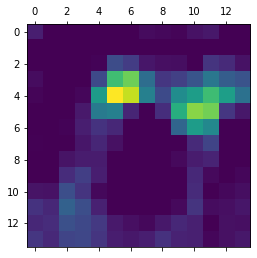

In [94]:
# Listing 5.43 Heatmap post-processing

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [95]:
# Listing 5.44 Superimposing the heatmap with the original picture

import cv2

img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('d:/@dataset/siamese.jpg', superimposed_img)

ModuleNotFoundError: No module named 'cv2'

## Chapter summary
* Convnets are the best tool for attacking visual-classification problems.
* Convnets work by learning a hierarchy of modular patterns and concepts to represent the visual world.
* The representations they learn are easy to inspect—convnets are the opposite of black boxes!
* You’re now capable of training your own convnet from scratch to solve an image-classification problem.
* You understand how to use visual data augmentation to fight overfitting.
* You know how to use a pretrained convnet to do feature extraction and fine-tuning.
* You can generate visualizations of the filters learned by your convnets, as well as heatmaps of class activity.